## **K - Nearest Neighbors**

K Nearest Neighbour is a simple algorithm that stores all the available cases and classifies the new data or case based on a similarity measure. It is mostly used to classifies a data point based on how its neighbours are classified. 

<img src = "https://miro.medium.com/max/718/1*X1KBJctko0RH6BWBsu-XjA.png">

<img src = "https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final1_ibdm8a.png" >

## **Geting Started with KNN Classifier**

In [18]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

## **DataFraming**

Read .csv data into a Dataframe

In [19]:
data = pd.read_csv("credit_data.csv")
data

,clientid,income,age,loan,LTI,default
0,1,66155.925095,59.017015,8106.532131,0.122537,0
1,2,34415.153966,48.117153,6564.745018,0.190752,0
2,3,57317.170063,63.108049,8020.953296,0.139940,0
3,4,42709.534201,45.751972,6103.642260,0.142911,0
4,5,66952.688845,18.584336,8770.099235,0.130989,1
...,...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0.032535,0
1996,1997,69516.127573,23.162104,3503.176156,0.050394,0
1997,1998,44311.449262,28.017167,5522.786693,0.124636,1
1998,1999,43756.056605,63.971796,1622.722598,0.037086,0


In [20]:
# A very simple & Logical technique to find total number of defaulters
data.default.sum()

283

In [21]:

#Finding  number of Nan or missing values in all columns
print(data.isna().sum(axis = 0))

# data.isna().sum(axis = 0)   # Nan values in every column
# data.isna().sum(axis = 1)   # Nan values in every row.

clientid    0
income      0
age         0
loan        0
LTI         0
default     0
dtype: int64


## **Features Extraction**

Extracting features and splitting data into test and train.

In [22]:
features = data[["income","age","loan"]]
target = data.default

In [23]:
features.head()

,income,age,loan
0,66155.925095,59.017015,8106.532131
1,34415.153966,48.117153,6564.745018
2,57317.170063,63.108049,8020.953296
3,42709.534201,45.751972,6103.642260
4,66952.688845,18.584336,8770.099235


In [24]:
target.head()

0    0
1    0
2    0
3    0
4    1
Name: default, dtype: int64

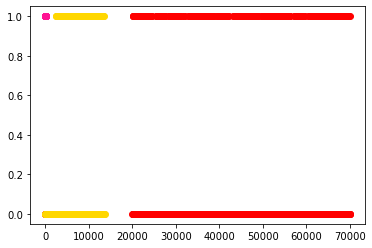

In [25]:
plt.scatter(data.income, data.default,color='red')
plt.scatter(data.age, data.default,color='deeppink')
plt.scatter(data.loan, data.default,color='gold')
plt.show()

In [26]:
data.head()

,clientid,income,age,loan,LTI,default
0,1,66155.925095,59.017015,8106.532131,0.122537,0
1,2,34415.153966,48.117153,6564.745018,0.190752,0
2,3,57317.170063,63.108049,8020.953296,0.139940,0
3,4,42709.534201,45.751972,6103.642260,0.142911,0
4,5,66952.688845,18.584336,8770.099235,0.130989,1


In [27]:
features.shape

(2000, 3)

In [28]:
target.shape

(2000,)

## **Preprocessing : Min Max Scaling**

In [29]:
features = preprocessing.MinMaxScaler().fit_transform(features)
features

array([[0.9231759 , 0.89209175, 0.58883739],
       [0.28812165, 0.65470788, 0.47682695],
       [0.74633429, 0.9811888 , 0.58262011],
       ...,
       [0.48612202, 0.21695807, 0.40112895],
       [0.47500998, 1.        , 0.1177903 ],
       [0.98881367, 0.82970913, 0.53597028]])

In [30]:
feature_train, feature_test, target_train, target_test = train_test_split(features,target)

## **Training the Model**

We are using KNeighborsClassifier model as imported from sklearn.neighbors library and then it's being trained on feature_train and target_train

In [31]:
model = KNeighborsClassifier(n_neighbors=3)
fitModel = model.fit(feature_train, target_train)
predictions = fitModel.predict(feature_test)

In [32]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

# **Printing an Error Matrix and Accuracy Score**

In [33]:
print("\nConfusion Matrix: \n",confusion_matrix(target_test,predictions))
print("\nAccuracy Score: ",accuracy_score(target_test,predictions))


Confusion Matrix: 
 [[416   6]
 [  8  70]]

Accuracy Score:  0.972


<AxesSubplot:>

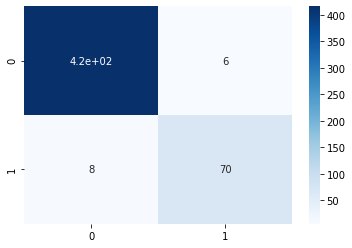

In [34]:
import seaborn as sns
sns.heatmap(confusion_matrix(target_test,predictions), annot=True, cmap='Blues')

## **Finding Optimal K Value (passing entire features)**

We are going to use cross-validation in order to find the optimal k value. This optimal value is not going to have as good accuracy and precision as we have seen for any neighbors close to n but it is going to be much more realistic because we use cross-validation. So we are going to use the cross-validation scores and then we are going to make a simple iteration. Basically we are going to consider k values from 1 up to 100.

In [35]:
cross_valid_scores = [] #empty list

for k in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn,features, target, cv = 10, scoring = 'accuracy')
    print(scores)
    cross_valid_scores.append(scores.mean())    

print("\nOptimal k with cross-validation: \t",np.argmax(cross_valid_scores))

[0.98  0.985 0.98  0.985 0.97  0.985 0.975 0.965 0.95  0.97 ]
[0.99  0.985 0.965 0.98  0.965 0.99  0.975 0.955 0.96  0.965]
[0.99  0.985 0.965 0.985 0.965 0.98  0.985 0.975 0.975 0.98 ]
[0.995 0.98  0.97  0.975 0.97  0.98  0.975 0.965 0.97  0.97 ]
[0.99  0.985 0.965 0.98  0.975 0.99  0.975 0.965 0.975 0.975]
[0.99  0.97  0.965 0.975 0.965 0.99  0.98  0.955 0.97  0.97 ]
[0.99  0.99  0.97  0.98  0.98  1.    0.985 0.965 0.965 0.975]
[0.985 0.985 0.975 0.975 0.98  1.    0.98  0.96  0.97  0.97 ]
[0.99  0.985 0.98  0.985 0.985 1.    0.98  0.97  0.96  0.97 ]
[0.99  0.985 0.975 0.975 0.985 0.995 0.98  0.97  0.97  0.965]
[0.985 0.99  0.98  0.975 0.985 0.995 0.985 0.97  0.965 0.97 ]
[0.98  0.985 0.975 0.97  0.99  0.995 0.985 0.98  0.965 0.965]
[0.975 0.985 0.98  0.985 0.98  0.99  0.985 0.975 0.965 0.97 ]
[0.98  0.985 0.97  0.975 0.99  0.995 0.975 0.975 0.97  0.97 ]
[0.985 0.985 0.975 0.975 0.985 0.99  0.975 0.975 0.965 0.97 ]
[0.98  0.98  0.97  0.975 0.98  0.995 0.97  0.975 0.96  0.97 ]
[0.985 0

In [36]:
model = KNeighborsClassifier(n_neighbors=32)
fitModel = model.fit(feature_train, target_train)
predictions = fitModel.predict(feature_test)

**Printing an Error Matrix and Accuracy Score**

In [37]:
print("\nConfusion Matrix: \n",confusion_matrix(target_test,predictions))
print("\nAccuracy Score: ",accuracy_score(target_test,predictions))


Confusion Matrix: 
 [[421   1]
 [ 14  64]]

Accuracy Score:  0.97


<AxesSubplot:>

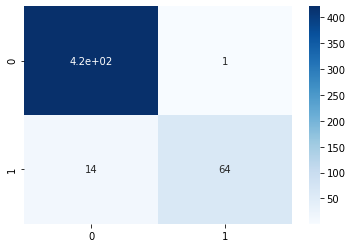

In [38]:
import seaborn as sns
sns.heatmap(confusion_matrix(target_test,predictions), annot=True, cmap='Blues')

**As we have passed the entire features, sometimes there is a chance that the model is over fitted**

# **Finding Optimal K Value (passing feature_train)**

In [39]:
cross_valid_scores = [] #empty list

for k in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn,feature_train, target_train, cv = 10, scoring = 'accuracy')
    print(scores)
    cross_valid_scores.append(scores.mean())    

print("\nOptimal k with cross-validation: \t",np.argmax(cross_valid_scores))

[0.97333333 0.99333333 0.98666667 0.98666667 0.98       0.98
 0.98       0.97333333 0.95333333 0.97333333]
[0.96666667 0.98666667 0.97333333 0.98       0.98       0.98
 0.97333333 0.94666667 0.94666667 0.97333333]
[0.96       0.98666667 1.         0.99333333 0.98       0.97333333
 0.97333333 0.95333333 0.96666667 0.98666667]
[0.95333333 0.99333333 0.99333333 0.98       0.98666667 0.97333333
 0.98666667 0.96666667 0.95333333 0.97333333]
[0.96666667 0.99333333 1.         0.99333333 0.98       0.96666667
 0.97333333 0.96       0.97333333 0.98      ]
[0.95333333 0.99333333 0.99333333 0.99333333 0.98       0.96666667
 0.98       0.96       0.96666667 0.98      ]
[0.97333333 0.99333333 1.         0.99333333 0.98       0.97333333
 0.96666667 0.97333333 0.97333333 0.98666667]
[0.96       0.99333333 0.99333333 0.99333333 0.97333333 0.97333333
 0.97333333 0.96       0.96666667 0.98666667]
[0.96       1.         0.99333333 0.99333333 0.97333333 0.98
 0.96       0.96666667 0.96666667 0.98666667]
[

[0.94666667 1.         0.98       0.97333333 0.96666667 0.96666667
 0.97333333 0.95333333 0.92       0.98      ]
[0.94666667 1.         0.97333333 0.97333333 0.96666667 0.96666667
 0.96666667 0.94666667 0.92       0.98      ]
[0.94       1.         0.98       0.97333333 0.96666667 0.96666667
 0.97333333 0.94666667 0.92       0.98      ]
[0.94       1.         0.98       0.97333333 0.96666667 0.96666667
 0.96666667 0.94666667 0.91333333 0.98      ]
[0.94       1.         0.98       0.97333333 0.96666667 0.96666667
 0.97333333 0.94666667 0.91333333 0.98      ]
[0.93333333 0.99333333 0.98       0.97333333 0.96666667 0.96666667
 0.96666667 0.94666667 0.91333333 0.98      ]
[0.94       0.99333333 0.98       0.97333333 0.96666667 0.96666667
 0.96666667 0.94666667 0.91333333 0.98      ]
[0.93333333 0.99333333 0.98       0.97333333 0.96666667 0.96666667
 0.96666667 0.94666667 0.91333333 0.98      ]
[0.93333333 0.99333333 0.98       0.97333333 0.96666667 0.96666667
 0.97333333 0.94666667 0.9133

In [40]:
model = KNeighborsClassifier(n_neighbors=18)
fitModel = model.fit(feature_train, target_train)
predictions = fitModel.predict(feature_test)

In [41]:
print("\nConfusion Matrix: \n",confusion_matrix(target_test,predictions))
print("\nAccuracy Score: ",accuracy_score(target_test,predictions))


Confusion Matrix: 
 [[421   1]
 [ 11  67]]

Accuracy Score:  0.976


<AxesSubplot:>

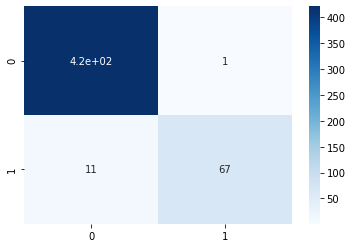

In [42]:
import seaborn as sns
sns.heatmap(confusion_matrix(target_test,predictions), annot=True, cmap='Blues')